In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

## EDA

### Carga de datos

In [263]:
games = pd.read_csv('games.csv',delimiter=';')

In [359]:
reviews = pd.read_csv('reviews.csv')

In [9]:
items = pd.read_csv('items.csv')

### Analisis de Games

In [29]:
games.head()

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0.0,767400.0,彼岸领域,2017.0
4,NaN,Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN


In [49]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28849 non-null  object 
 1   item_name     32131 non-null  object 
 2   tags          31969 non-null  object 
 3   specs         31462 non-null  object 
 4   price         30755 non-null  float64
 5   early_access  32131 non-null  float64
 6   item_id       32131 non-null  float64
 7   developer     28834 non-null  object 
 8   release_year  29961 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.2+ MB


In [40]:
games['genres'] = games['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
games['tags'] = games['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
games['specs'] = games['specs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [82]:
#Crea una lista con todos los unicos de las listas de una columna
def frec_unicos(col):
    u = []
    for sublist in col:
        if type(sublist)==list:
            for genre in sublist:
                u.append(genre)
    return pd.Series(u).value_counts()

#### Genres

In [122]:
games

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,767400.0,彼岸领域,2017.0
4,NaN,Log Challenge,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32126,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,"[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS""",2018.0
32127,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,"[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,2018.0
32128,"[Indie, Racing, Simulation]",Russian Roads,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,2018.0
32129,"[Casual, Indie]",EXIT 2 - Directions,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...","[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017.0


In [123]:
lista_genres=frec_unicos(games['genres'])

In [124]:
lista_genres

Indie                        15857
Action                       11318
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [196]:
lista_genres.size

22

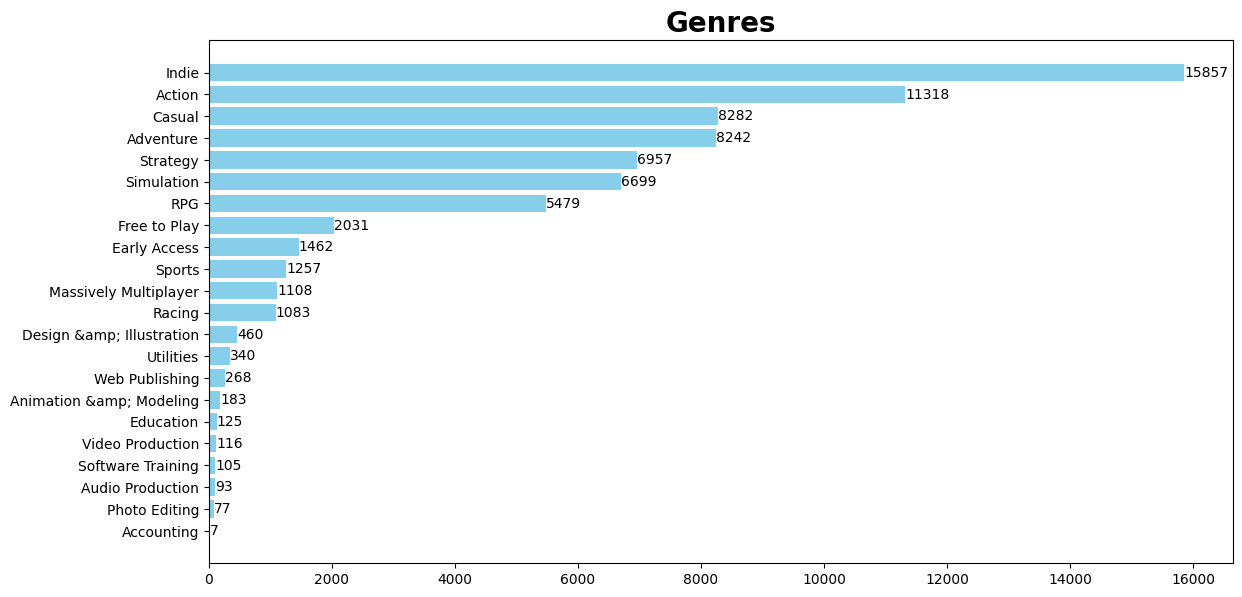

In [453]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_genres.index,lista_genres.values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Genres', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_genres.values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Item_name

In [180]:
np.size(games['item_name'].unique())

32094

In [424]:
games['item_name'].value_counts().head(15)

item_name
Soundtrack                  3
Escape Room                 2
Taxi                        2
WARZONE                     2
Total Extreme Wrestling     2
Colony                      2
Dark Matter                 2
Invasion                    2
Alter Ego                   2
Castles                     2
Archangel                   2
Hero                        2
New York Bus Simulator      2
Invisible Apartment Zero    2
Invisible Apartment 2       2
Name: count, dtype: int64

In [187]:
games[games.duplicated(subset=['item_name'])].size

333

#### Tags

In [192]:
lista_tags=frec_unicos(games['tags'])

In [354]:
pd.set_option('display.max_rows', None)
lista_tags

Indie                                17619
Action                               13002
Adventure                             9829
Casual                                9739
Simulation                            7730
Strategy                              7566
RPG                                   5919
Singleplayer                          4344
Free to Play                          2406
Multiplayer                           2383
Great Soundtrack                      2234
Puzzle                                2111
Early Access                          1947
2D                                    1945
Atmospheric                           1933
VR                                    1796
Sports                                1597
Platformer                            1449
Story Rich                            1444
Sci-fi                                1387
Fantasy                               1363
Horror                                1332
Open World                            1317
Difficult  

In [358]:
pd.reset_option('display.max_rows')

In [194]:
lista_tags.size

339

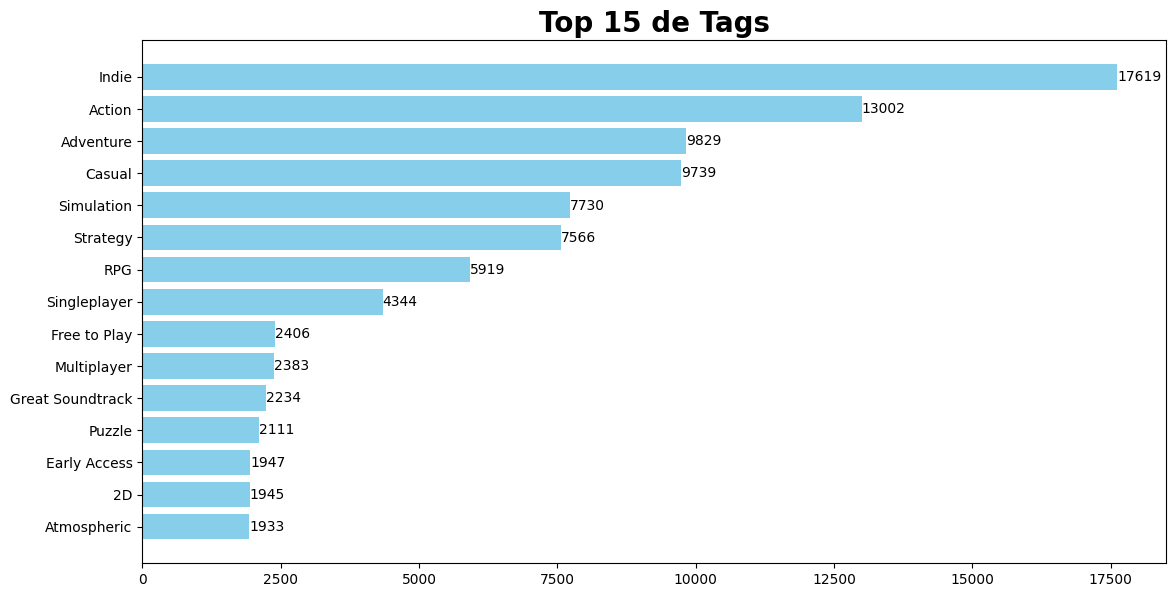

In [452]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_tags.head(15).index,lista_tags.head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Tags', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_tags.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Specs

In [200]:
lista_specs=frec_unicos(games['specs'])

In [201]:
lista_specs

Single-player                 27574
Steam Achievements            16364
Downloadable Content          12691
Steam Trading Cards           12198
Steam Cloud                    9958
Multi-player                   8198
Full controller support        7384
Partial Controller Support     6538
Steam Leaderboards             6081
Co-op                          4280
Shared/Split Screen            3962
Cross-Platform Multiplayer     2550
Online Multi-Player            2370
Stats                          2321
HTC Vive                       1984
Steam Workshop                 1866
Tracked Motion Controllers     1816
Captions available             1643
Standing                       1462
Room-Scale                     1445
Includes level editor          1377
Local Multi-Player             1237
Oculus Rift                    1213
Seated                         1090
Online Co-op                    998
MMO                             942
In-App Purchases                933
Local Co-op                 

In [202]:
lista_specs.size

40

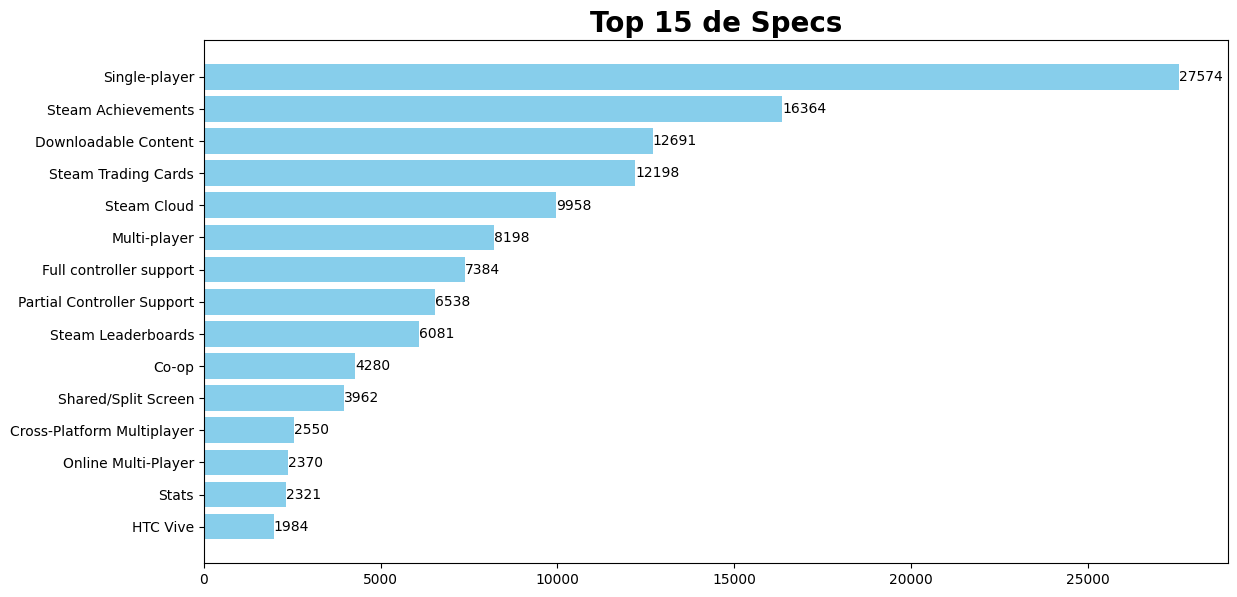

In [451]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_specs.head(15).index,lista_specs.head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Specs', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_specs.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Price

In [16]:
games['price'].describe()

count    30755.000000
mean         8.895293
std         16.338786
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

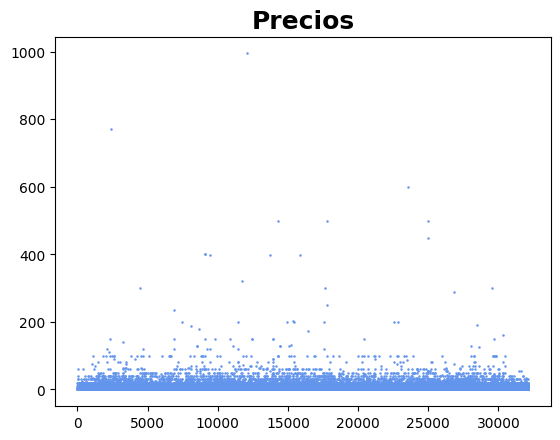

In [450]:
plt.plot(games['price'],'o',markersize=0.8,color='cornflowerblue')
plt.title('Precios', fontweight = 'bold',fontsize=18)
plt.show()

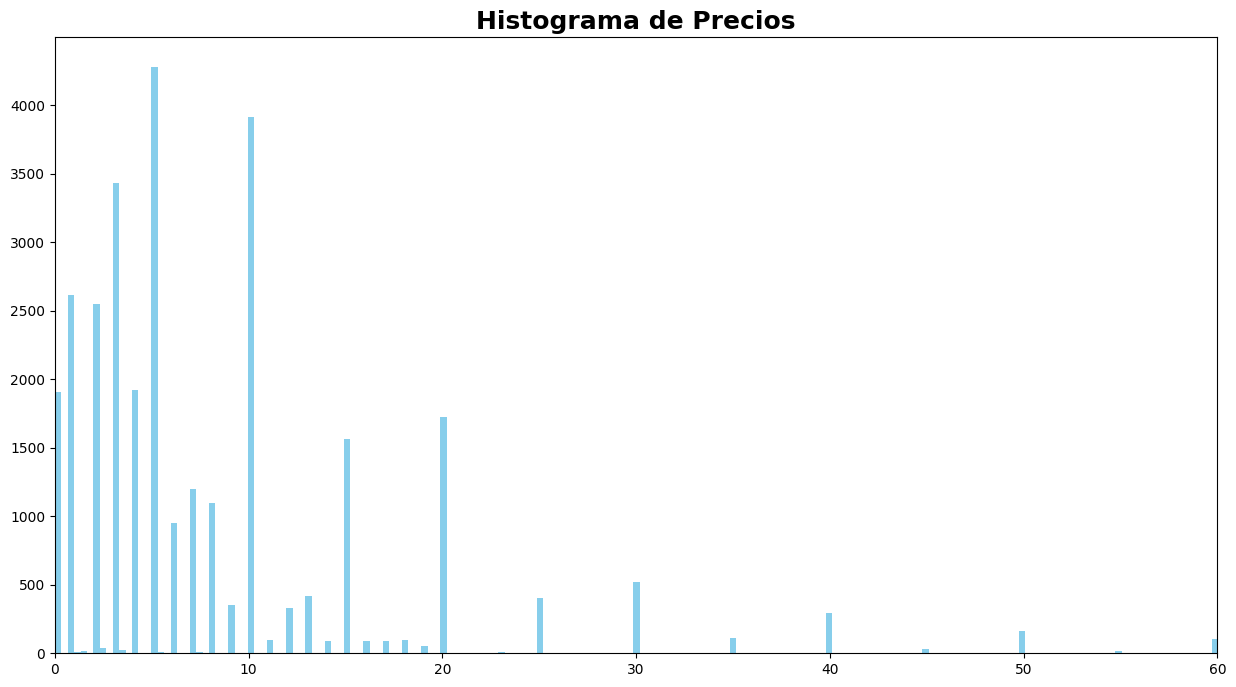

In [448]:
plt.figure(figsize=(15,8))
plt.hist(games['price'],bins=3000,color='skyblue')
plt.title('Histograma de Precios', fontweight = 'bold',fontsize=18)
plt.xlim(0,60)
plt.show()

##### Analisis de BoxPlot

In [239]:
#Calculo de bigotes
Q3 = float(games['price'].quantile(0.75))
Q1 = float(games['price'].quantile(0.25))
RIC = Q3 - Q1

min_price = Q1 - 1.5*RIC
if min_price < min(games['price']):
    min_price = min(games['price'])
max_price = Q3 + 1.5*RIC
if max_price > max(games['price']):
    max_price = max(games['price'])

min_price, max_price

(0.0, 20.490000000000002)

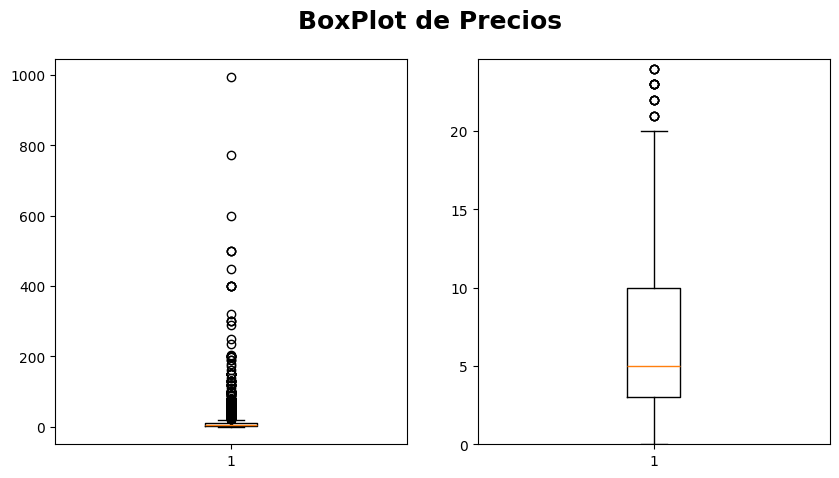

In [256]:
fig, ax = plt.subplots(1, 2,figsize = (10,5))
fig.suptitle('BoxPlot de Precios',fontsize=18, fontweight='bold')

ax[0].boxplot(games['price'].dropna())

ax[1].boxplot(games['price'].dropna())
ax[1].set_ylim(min_price*0.8, max_price*1.2)

plt.show()

In [277]:
print('Cantidad de outliers:', games[games['price']>=max_price].shape[0])
print('Porcentaje de outliers:',(games[games['price']>=max_price].shape[0]/games.shape[0])*100,'%')

Cantidad de outliers: 1884
Porcentaje de outliers: 5.863496311972861 %


In [267]:
games[games['price']>=max_price]

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
8,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Legend Pass,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",29.99,0.0,774278.0,Poppermost Productions,2018.0
18,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - Lifetime Pack,"['Free to Play', 'Indie', 'Simulation', 'Sports']","['Single-player', 'Multi-player', 'Online Mult...",59.99,0.0,774279.0,Poppermost Productions,2018.0
51,NaN,Medicalholodeck Personal Version,['Education'],"['Tracked Motion Controllers', 'Seated', 'Stan...",29.99,0.0,769350.0,NaN,NaN
59,['Racing'],RACE - The WTCC Game,"['Racing', 'Simulation']","['Single-player', 'Multi-player']",39.99,0.0,4230.0,SimBin,2006.0
233,"['Massively Multiplayer', 'RPG']",Guild Wars Trilogy,"['RPG', 'Massively Multiplayer', 'MMORPG', 'PvP']","['Multi-player', 'MMO']",29.99,0.0,29570.0,ArenaNet®,2008.0
...,...,...,...,...,...,...,...,...,...
31934,"['RPG', 'Simulation']",愛神餐館2,"['RPG', 'Simulation', 'Anime']",['Single-player'],34.99,0.0,769680.0,Firedog Creative Company Limited,2017.0
31952,NaN,Three Kingdoms VR - Jade Knight (光之三國VR - 青龍騎),"['Action', 'Casual', 'Simulation', 'Sports']","['Single-player', 'Steam Achievements', 'Steam...",24.99,0.0,731120.0,NaN,NaN
31955,"['Massively Multiplayer', 'Racing', 'Simulatio...",CarX Drift Racing Online - Deluxe,"['Massively Multiplayer', 'Simulation', 'Racin...","['Single-player', 'Multi-player', 'Online Mult...",29.99,0.0,776950.0,CarX Technologies,2017.0
32066,"['Action', 'Adventure', 'Casual', 'Indie', 'Si...",Mesozoica,"['Early Access', 'Simulation', 'Strategy', 'Ca...",['Single-player'],29.99,1.0,719590.0,"DreamInCode B.V.,Squadron Interactive",2018.0


In [293]:
pd.set_option('display.max_rows', None)
print(games['price'].value_counts().sort_index(ascending=True))

price
0.00      1908
0.49         2
0.50         1
0.89         1
0.95         1
0.98         2
0.99      2607
1.00         4
1.25         3
1.29         2
1.39         1
1.49         9
1.50         1
1.59         3
1.87         1
1.95         1
1.99      2541
2.00         3
2.30         1
2.49        38
2.66         1
2.89         1
2.97         1
2.99      3429
3.00         1
3.33         2
3.39         1
3.49        19
3.99      1918
4.00         1
4.29         1
4.49         4
4.68         1
4.99      4278
5.00         2
5.49         7
5.65         1
5.99       948
6.00         1
6.48         1
6.49         1
6.66         1
6.99      1199
7.00         1
7.49        11
7.99      1095
8.98         1
8.99       347
9.00         1
9.69         1
9.95         1
9.98         1
9.99      3902
10.00        5
10.49        1
10.93        1
10.96        1
10.99       93
11.15        1
11.99      331
12.00        1
12.89        1
12.99      417
13.37        1
13.98        1
13.99       92
14.9

In [357]:
pd.reset_option('display.max_rows')

#### Early_access

In [299]:
games['early_access'].value_counts()

early_access
0.0    30184
1.0     1947
Name: count, dtype: int64

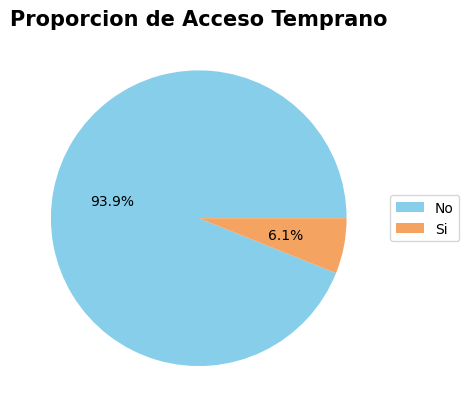

In [443]:
plt.pie(games['early_access'].value_counts(),autopct='%1.1f%%',colors=['skyblue','sandybrown'])
plt.title('Proporcion de Acceso Temprano',fontsize=15,fontweight='bold')
plt.legend(['No','Si'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### Developer

In [141]:
np.size(games['developer'].unique())

10993

In [150]:
games['developer'].value_counts()

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Tony Wang                        1
Trokardia                        1
Sai Attack                       1
Cyber Prophet                    1
Wrecked Angle Studios            1
Name: count, Length: 10992, dtype: int64

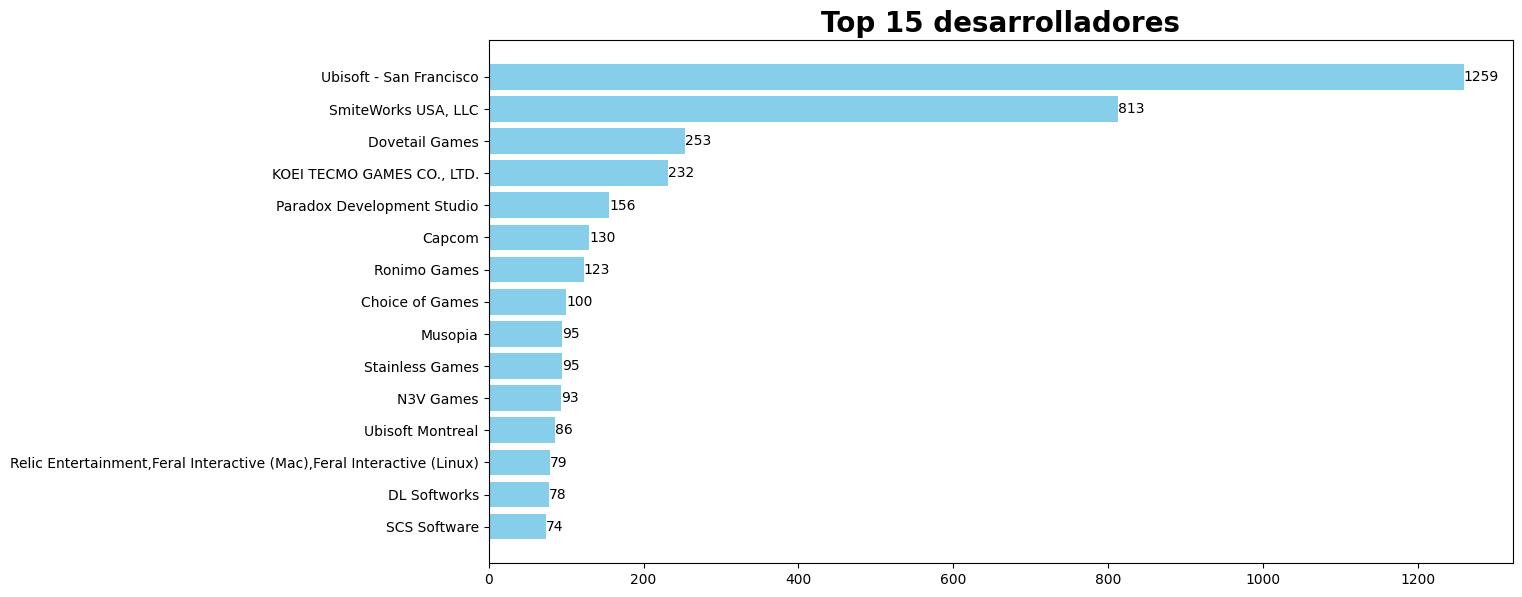

In [439]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(games['developer'].dropna().value_counts().head(15).index,games['developer'].dropna().value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 desarrolladores', fontweight = 'bold',fontsize=20)
for index, value in enumerate(games['developer'].dropna().value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Release_year

In [310]:
games['release_year'].unique().size

44

In [312]:
games['release_year'].value_counts().sort_index(ascending=True)

release_year
1970.0       2
1975.0       1
1980.0       1
1981.0       3
1982.0       3
1983.0       4
1984.0       4
1985.0       3
1986.0       1
1987.0       9
1988.0       7
1989.0      10
1990.0      12
1991.0      16
1992.0      15
1993.0      34
1994.0      36
1995.0      33
1996.0      39
1997.0      42
1998.0      61
1999.0      55
2000.0      40
2001.0      69
2002.0      50
2003.0      84
2004.0      79
2005.0     102
2006.0     155
2007.0     167
2008.0     213
2009.0     341
2010.0     442
2011.0     590
2012.0    1192
2013.0    1552
2014.0    2843
2015.0    4952
2016.0    6943
2017.0    9594
2018.0     157
2019.0       4
2021.0       1
Name: count, dtype: int64

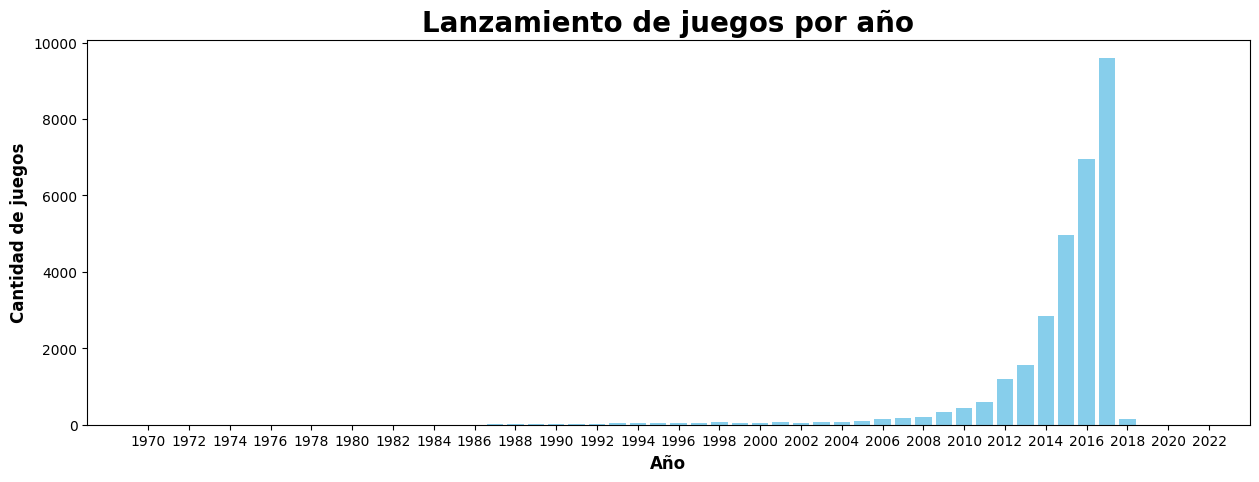

In [438]:
plt.figure(figsize=(15,5))
plt.bar(games['release_year'].value_counts().index,games['release_year'].value_counts().values,color='skyblue')
plt.title('Lanzamiento de juegos por año',fontweight = 'bold',fontsize=20)
plt.xlabel('Año',fontweight = 'bold',fontsize=12)
plt.ylabel('Cantidad de juegos',fontweight = 'bold',fontsize=12)
plt.xticks(ticks=list(range(1970,2023,2)))
plt.show()

### Analisis de Reviews

In [360]:
reviews.head()

,user_id,item_id,recommend,review,item_name
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...,Killing Floor
1,76561197970982479,22200.0,True,It's unique and worth a playthrough.,Zeno Clash
2,76561197970982479,43110.0,True,Great atmosphere. The gunplay can be a bit chu...,Metro 2033
3,js41637,251610.0,True,I know what you think when you see this title ...,Barbie™ Dreamhouse Party™
4,js41637,227300.0,True,For a simple (it's actually not all that simpl...,Euro Truck Simulator 2


In [361]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    58431 non-null  object 
 1   item_id    58431 non-null  float64
 2   recommend  58431 non-null  bool   
 3   review     58401 non-null  object 
 4   item_name  58227 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 1.8+ MB


#### User_id

In [417]:
reviews['user_id'].value_counts()

user_id
yoshi278              10
76561198101552611     10
TheUnderdog2020       10
nabady                10
SKELETRONPRIMEISOP    10
                      ..
Tattzie                1
sexyawp                1
GodLoveGuru            1
943525                 1
76561198277602337      1
Name: count, Length: 25458, dtype: int64

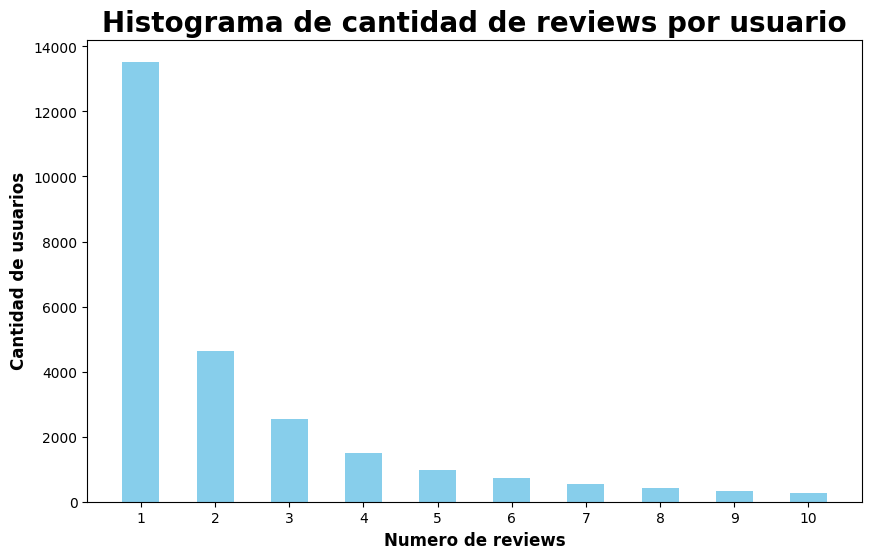

In [437]:
values_counts = reviews['user_id'].value_counts().value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(values_counts.index, values_counts.values, width=0.5, align='center',color='skyblue')
plt.title("Histograma de cantidad de reviews por usuario", fontweight='bold', fontsize=20)
plt.xlabel("Numero de reviews", fontweight='bold', fontsize=12)
plt.ylabel("Cantidad de usuarios", fontweight='bold', fontsize=12)
plt.xticks(ticks=values_counts.index)
plt.show()


#### Item_id y Item_name

Se tienen 204 registros con 'item_id', pero no 'item_name'. Por lo tanto, se decidio realizar el analisis solamente sobre la columna 'item_name'

In [422]:
reviews['item_id'].value_counts()

item_id
730.0       3708
440.0       3694
4000.0      1704
570.0       1544
218620.0    1113
            ... 
203250.0       1
385890.0       1
431840.0       1
256500.0       1
370360.0       1
Name: count, Length: 3682, dtype: int64

In [423]:
reviews['item_name'].value_counts()

item_name
Counter-Strike: Global Offensive    3708
Team Fortress 2                     3694
Garry's Mod                         1704
Dota 2                              1544
PAYDAY 2                            1113
                                    ... 
Golden Rush                            1
3DRPG                                  1
Hocus Pocus                            1
Word Rescue                            1
TIS-100                                1
Name: count, Length: 3586, dtype: int64

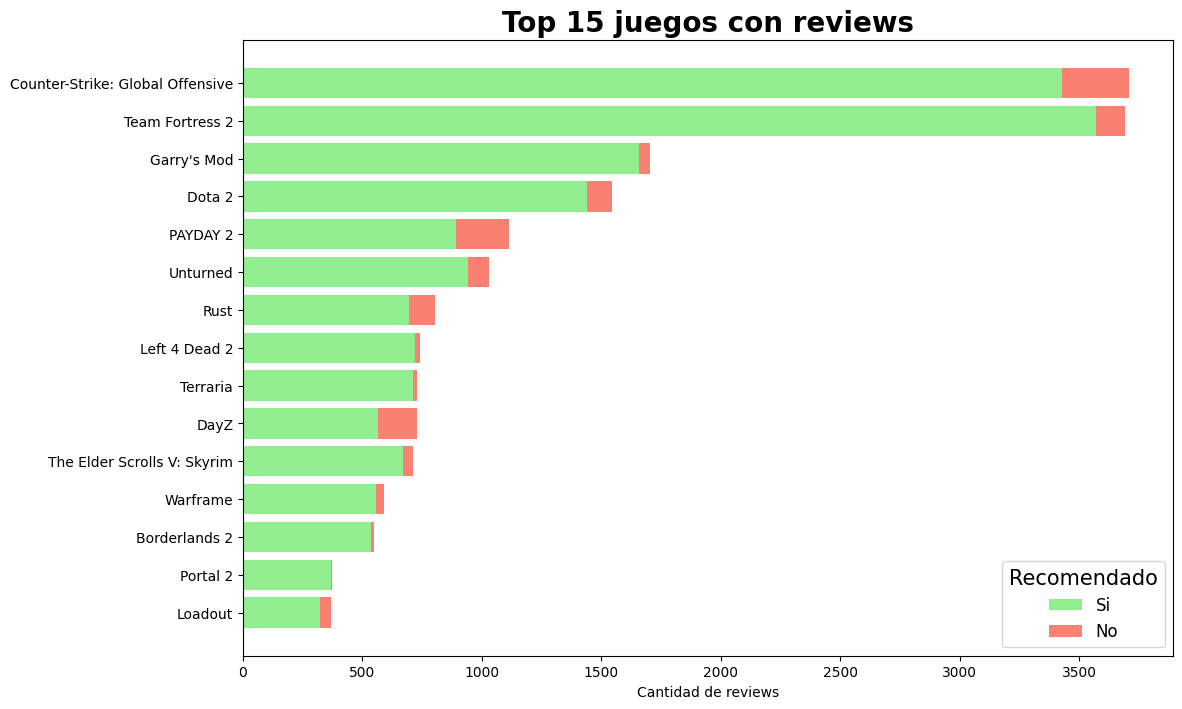

In [464]:
juegos = reviews['item_name'].dropna().value_counts().head(15).index
positivas = reviews[reviews['recommend'] == True]['item_name'].value_counts().reindex(juegos, fill_value=0).values
negativas = reviews[reviews['recommend'] == False]['item_name'].value_counts().reindex(juegos, fill_value=0).values

plt.figure(figsize=(12, 8))
plt.barh(juegos, positivas, label='Si',color='lightgreen')
plt.barh(juegos, negativas, left=positivas, label='No', color='salmon')
plt.xlabel("Cantidad de reviews")
plt.title("Top 15 juegos con reviews", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

#### Recommend

In [420]:
reviews['recommend'].value_counts()

recommend
True     51692
False     6739
Name: count, dtype: int64

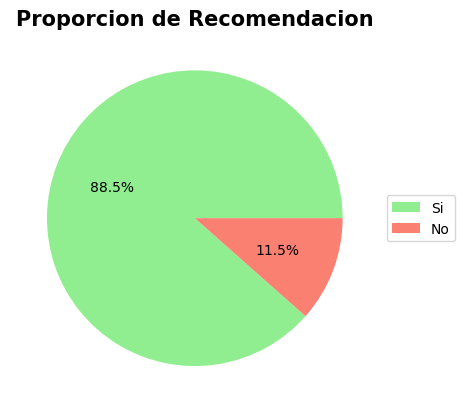

In [467]:
plt.pie(reviews['recommend'].value_counts(),autopct='%1.1f%%',colors=['lightgreen','salmon'])
plt.title('Proporcion de Recomendacion',fontsize=15,fontweight='bold')
plt.legend(['Si','No'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### Analisis de Items

In [10]:
items.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10.0,Counter-Strike,6.0,0.0
1,76561197970982479,277,20.0,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,30.0,Day of Defeat,7.0,0.0
3,76561197970982479,277,40.0,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,50.0,Half-Life: Opposing Force,0.0,0.0


In [11]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           float64
 3   item_name         object 
 4   playtime_forever  float64
 5   playtime_2weeks   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 233.2+ MB


#### User_id

In [366]:
items['user_id'].value_counts()

user_id
phrostb              7762
thugnificent         6700
chidvd               6410
piepai               6132
mayshowganmore       5027
                     ... 
76561198316040453       1
76561198281016291       1
76561198280083270       1
gamerscoutnet           1
76561198058251035       1
Name: count, Length: 70912, dtype: int64

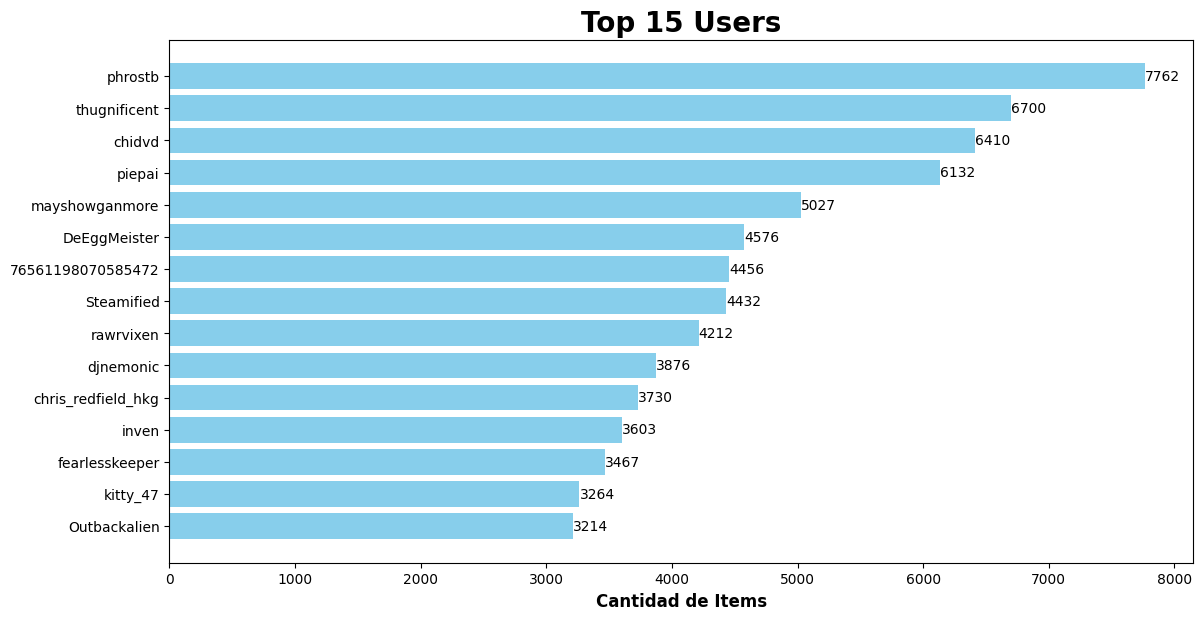

In [468]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(items['user_id'].value_counts().head(15).index,items['user_id'].value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 Users', fontweight = 'bold',fontsize=20)
plt.xlabel('Cantidad de Items',fontweight = 'bold',fontsize=12)
for index, value in enumerate(items['user_id'].value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Item_name

#### Playtime_forever

#### Playtime_2weeks